## Machine Learning Lab

In [2]:
import math
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Part 1: Pre-processing and EDA

#### Problem 1: Dataset Importing and Cleaning

In [33]:
orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.00,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.10,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.10,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.10,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.00,$311.52,903.040,Critical
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.10,$763.28,897.350,Critical
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.00,$564.84,894.770,Critical
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.00,$996.48,878.380,High
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.00,$54.71,25.270,High
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.20,$5.48,11.130,High


In [4]:
orders['Profit'] = orders.Profit.replace('[$,]', '', regex=True).astype(float)
orders['Sales'] = orders.Profit.replace('[$,]', '', regex=True).astype(float)

#### Problem 2: Inventory Management

In [12]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Month'] = pd.to_datetime(orders['Order.Date']).dt.month
orders['Year'] = orders['Order.Date'].apply(lambda x: int(x.strftime('%Y')))
orders['Month.Year'] = orders['Year'].astype(str) + orders['Month'].astype(str)

In [13]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Month.Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,62.15,2,0.00,62.15,40.770,High,11,2014,201411
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",-288.77,9,0.10,-288.77,923.630,Critical,2,2014,20142
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",919.97,9,0.10,919.97,915.490,Medium,10,2014,201410
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",-96.54,5,0.10,-96.54,910.160,Medium,1,2014,20141
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",311.52,8,0.00,311.52,903.040,Critical,11,2014,201411
5,22732,IN-2014-JM156557-41818,2014-06-28,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,"Samsung Smart Phone, with Caller ID",763.28,5,0.10,763.28,897.350,Critical,6,2014,20146
6,30570,IN-2012-TS2134092-41219,2012-11-06,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,"Novimex Executive Leather Armchair, Adjustable",564.84,4,0.00,564.84,894.770,Critical,11,2012,201211
7,31192,IN-2013-MB1808592-41378,2013-04-14,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,"Chromcraft Conference Table, Fully Assembled",996.48,6,0.00,996.48,878.380,High,4,2013,20134
8,40099,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,"Sauder Facets Collection Library, Sky Alder Fi...",54.71,2,0.00,54.71,25.270,High,11,2014,201411
9,36258,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,"Global Push Button Manager's Chair, Indigo",5.48,1,0.20,5.48,11.130,High,3,2012,20123


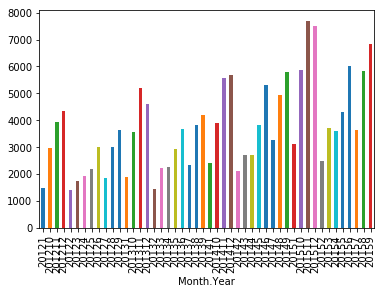

In [15]:
plot1 = orders.groupby('Month.Year').sum()
plot1.Quantity.plot(kind="bar")

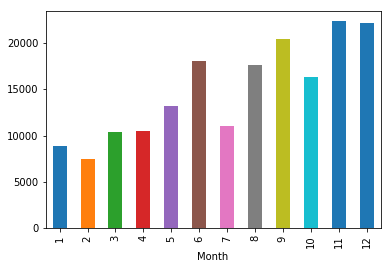

In [16]:
plot2 = orders.groupby('Month').sum()
plot2.Quantity.plot(kind="bar")

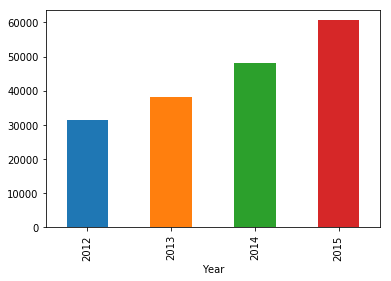

In [18]:
plot3 = orders.groupby('Year').sum()
plot3.Quantity.plot(kind="bar")

It looks like there's some seasonality trends occuring in the data, particularly around November and December presumably for "Black Friday", "Cyber Monday", and the holidays. Additionally there's a relative "spike" in June which can be correlated with the "June Bride" phenomenon and or birthdays. 

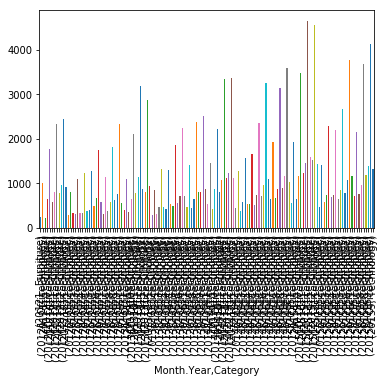

In [21]:
plot4 = orders.groupby(['Month.Year', 'Category']).sum()
plot4.Quantity.plot(kind="bar")

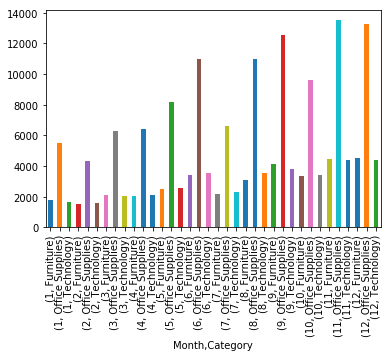

In [22]:
plot5 = orders.groupby(['Month', 'Category']).sum()
plot5.Quantity.plot(kind="bar")

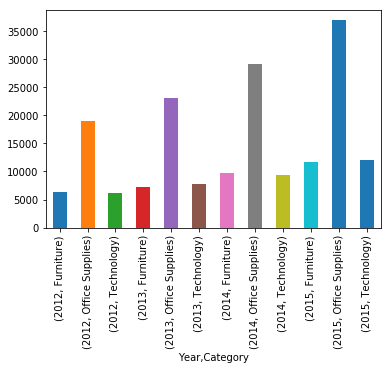

In [23]:
plot1 = orders.groupby(['Year', 'Category']).sum()
plot1.Quantity.plot(kind="bar")

There does not seem to be much variance in seasonality by category, perhaps minutely for "Technology" in November and December. 

#### Problem 3: Why did customers make returns?

In [34]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [35]:
returns.columns = returns.columns.str.replace("Order ID", "Order.ID")

In [31]:
totaldata = pd.merge(orders, returns[['Order.ID','Returned']], on = 'Order.ID', how="left")
totaldata.head(100)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year,Month.Year,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,2,0.00,62.15,40.770,High,11,2014,201411,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,9,0.10,-288.77,923.630,Critical,2,2014,20142,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,9,0.10,919.97,915.490,Medium,10,2014,201410,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,5,0.10,-96.54,910.160,Medium,1,2014,20141,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,8,0.00,311.52,903.040,Critical,11,2014,201411,NaN
5,22732,IN-2014-JM156557-41818,2014-06-28,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,763.28,5,0.10,763.28,897.350,Critical,6,2014,20146,NaN
6,30570,IN-2012-TS2134092-41219,2012-11-06,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,564.84,4,0.00,564.84,894.770,Critical,11,2012,201211,NaN
7,31192,IN-2013-MB1808592-41378,2013-04-14,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,996.48,6,0.00,996.48,878.380,High,4,2013,20134,NaN
8,40099,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,54.71,2,0.00,54.71,25.270,High,11,2014,201411,NaN
9,36258,CA-2012-AB10015140-40974,2012-03-06,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,5.48,1,0.20,5.48,11.130,High,3,2012,20123,NaN


In [38]:
totaldata['Returned'].unique()

array([nan, 'Yes'], dtype=object)

In [65]:
return1 = totaldata.loc[totaldata.Returned == "Yes", "Profit"].sum()
return1

61370.75

In [67]:
return1_count = totaldata.loc[totaldata.Returned=="Yes", :].groupby('Customer.ID').agg({'Order.ID':'count'}).count()
return1_count

Order.ID    1061
dtype: int64

There are 1,061 people who returned at least 1 item for a grand total of $61,370.75 profit loss.

In [96]:
#totaldata[(totaldata.Returned == "Yes") & (totaldata['Order.ID'] > 5).count()]
tmp_ = totaldata[totaldata.Returned=='Yes'].groupby(['Customer.ID']).agg({"Customer.ID":"count"})
tmp_.loc[tmp_["Customer.ID"]>5, :].count()

Customer.ID    46
dtype: int64

In [97]:
totaldata.loc[totaldata.Returned=="Yes", :].groupby('Region').agg({'Order.ID':'count'}).sort_values('Order.ID')

,Order.ID
Region,
Central Asia,9
Canada,15
Central Africa,17
Eastern Africa,18
Southern Africa,25
Eastern Europe,42
North Africa,51
Western Africa,60
Caribbean,69


In [98]:
totaldata.loc[totaldata.Returned=="Yes", :].groupby('Category').agg({'Order.ID':'count'}).sort_values('Order.ID')

,Order.ID
Category,
Furniture,427
Technology,445
Office Supplies,1348


Most of the returns came fro mCentral America with the highest category of "Office Supplies."

### Part 2: Machine Learning and Business Use Case

#### Problem 4: Feature Engineering

#### Step 1

#### Step 2

#### Step 3

#### Problem 5: Fitting Models

#### Problem 6: Evaluating Models

#### Problem 7: Feature Engineering Revisit